# Housing Prices

**longitude:** A measure of how far west a house is; a higher value is farther west  
**latitude:** A measure of how far north a house is; a higher value is farther north  
**housingMedianAge:** Median age of a house within a block; a lower number is a newer building  
**totalRooms:** Total number of rooms within a block  
**totalBedrooms:** Total number of bedrooms within a block  
**population:** Total number of people residing within a block  
**households:** Total number of households, a group of people residing within a home unit, for a block  
**medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)  
**medianHouseValue:** Median house value for households within a block (measured in US Dollars)  
**oceanProximity:** Location of the house w.r.t ocean/sea  

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
sns.set_style("darkgrid")

In [333]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm
from pyod.models.knn import KNN

### Overview
1\) Understanding the data  
2\) Feature engineering  
3\) Model Evaluation


### Understanding the data

In [334]:
df=pd.read_csv('content/housing.csv')

In [335]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [337]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [338]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [339]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


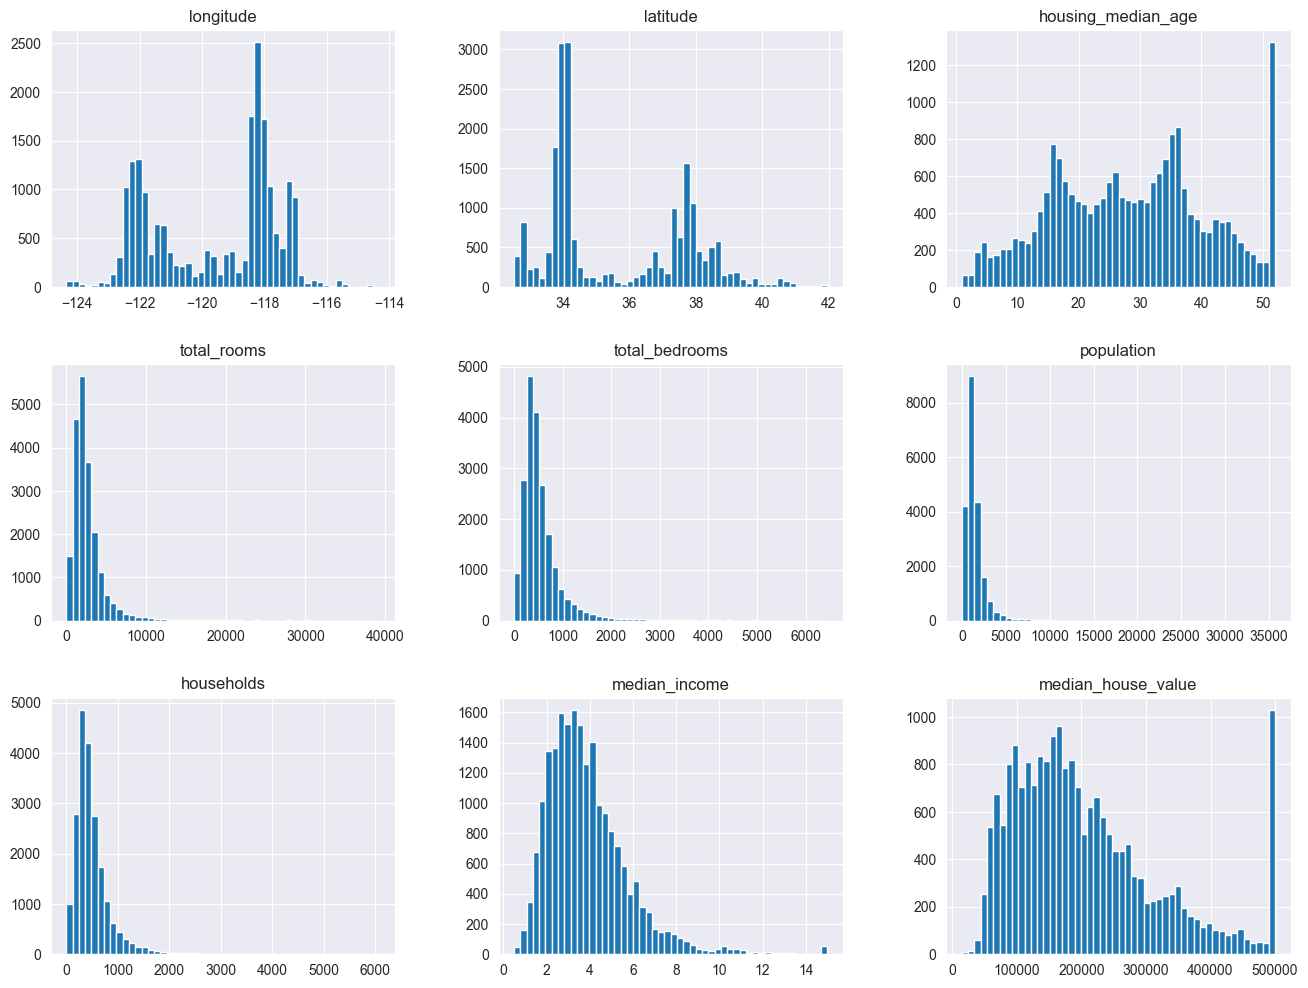

In [340]:
df.hist(figsize=(16,12),bins=50);

In [341]:
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude",
                        zoom=8, 
                        height=800,
                        width=800,
                        color='median_house_value',
                        size='population',
                        color_continuous_scale=px.colors.sequential.Jet, size_max=15
                       )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [342]:
df.drop('ocean_proximity',axis=1).corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

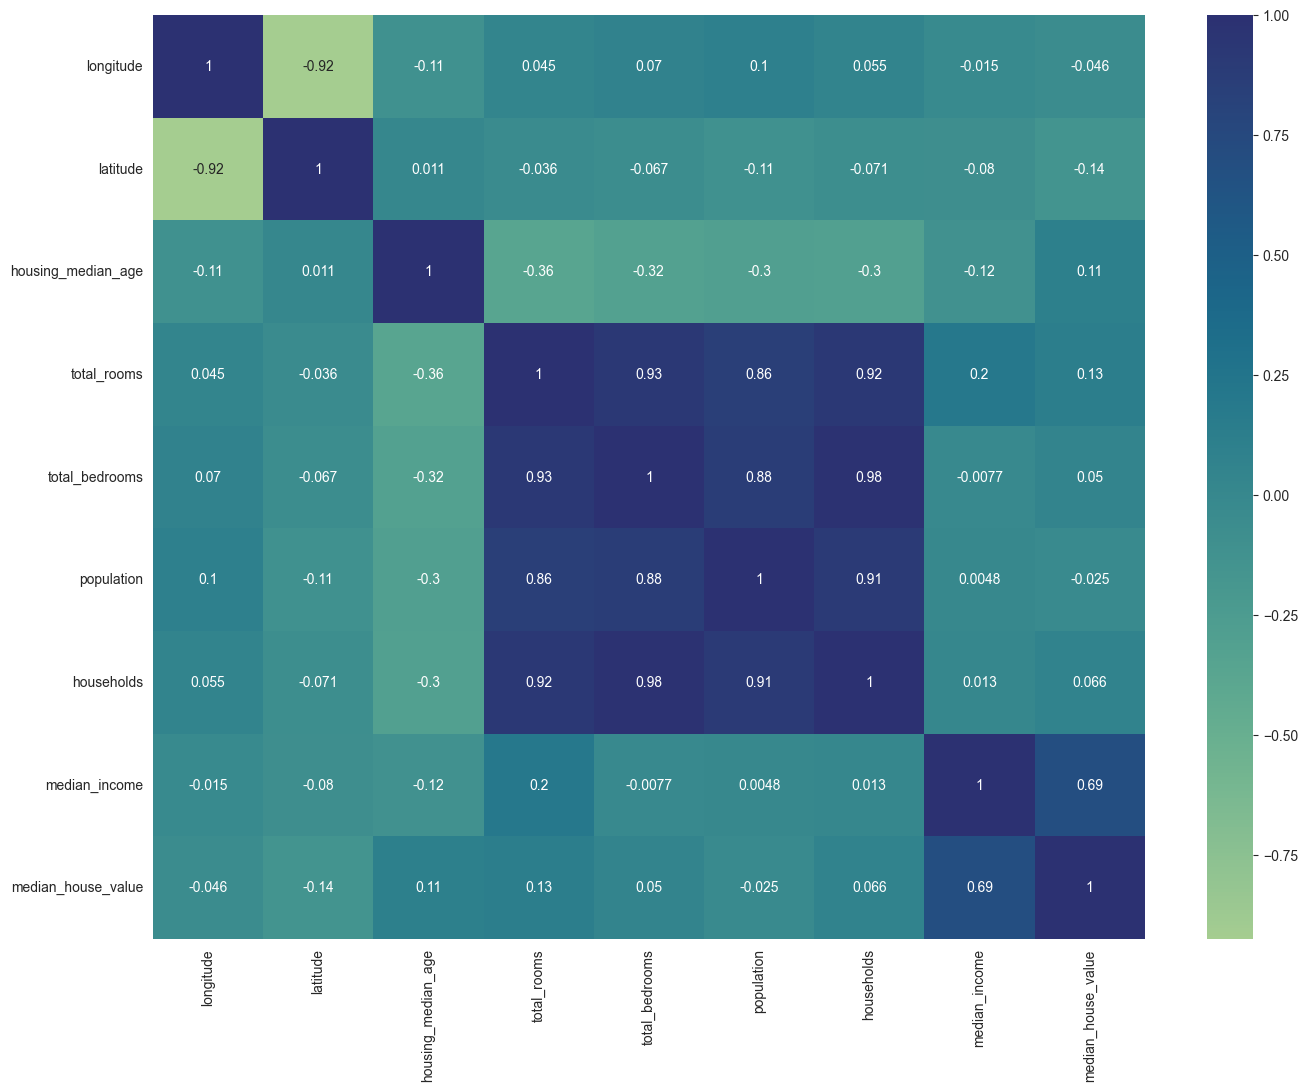

In [343]:
fig,ax=plt.subplots(figsize=(16,12))
ax=sns.heatmap(df.drop('ocean_proximity',axis=1).corr(),annot=True,cmap='crest')
print()

### Feature Enginnering

- Handle NaN
- Categorica Variable
- Outliers
- Format the Data
- Clean the Data
- Pearson Correlation

In [344]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [345]:
#df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)
#df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)
df_na=df.dropna(subset=['total_bedrooms'])
df_na.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [346]:
# categorical data
dummies=pd.get_dummies(df_na['ocean_proximity'],dtype=int)
df=pd.concat([df_na,dummies],axis=1)
df.drop(['ocean_proximity','ISLAND'],axis=1,inplace=True)

In [347]:
# outliers
detector=KNN()
detector.fit(df.iloc[:,:8])
previsoes=detector.labels_
print(f"Outliers: {np.unique(previsoes,return_counts=True)[1][1]} registros")

outliers = []
for i in range(len(previsoes)):
    if previsoes[i]==1:
        outliers.append(i)
df.reset_index(drop=True, inplace=True)
df.drop(outliers,axis=0,inplace=True)

Outliers: 2044 registros


In [348]:
teste=df

In [349]:
teste.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

### Modeling

In [350]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [351]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [300]:
# NUMERIC=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
# scaler=MinMaxScaler()
# X_train[NUMERIC]=scaler.fit_transform(X_train[NUMERIC])
# X_test[NUMERIC]=scaler.fit_transform(X_test[NUMERIC])

In [316]:
modelos = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),    
    'Ridge': Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor()
}
modelo_rmse = []
modelo_r2 = []
modelo_nomes = []

for nome, modelo in modelos.items():
    fit_modelo = modelo.fit(X_train, y_train)
    predicao = fit_modelo.predict(X_test)
    
    modelo_r2.append(r2_score(y_test, predicao))
    modelo_rmse.append(np.sqrt(mean_squared_error(y_test, predicao)))
    modelo_nomes.append(nome)
    
    resultado_final = pd.DataFrame([modelo_nomes, modelo_r2, modelo_rmse]).T
    resultado_final = resultado_final.rename(columns={0:'Modelo', 1: 'R2', 2:'RMSE'}).sort_values(by = 'RMSE')
    
resultado_final

,Modelo,R2,RMSE
1,RandomForestRegressor,0.826001,48610.031914
3,GradientBoostingRegressor,0.778412,54856.238617
0,LinearRegression,0.6725,66689.660917
2,Ridge,0.672369,66702.942342


#### Linear Regression

In [315]:
LR=LinearRegression()
LR.fit(X_train,y_train)
mean_squared_error(LR.predict(X_train),y_train,squared=False),mean_squared_error(LR.predict(X_test),y_test,squared=False)

(65756.64318953098, 66689.66091711078)

In [320]:
# display the intercept and coefficients of the Logistic Regression model
print(f"Intercept: {LR.intercept_}")
print(f"Coef: {LR.coef_}")
print("\n")
print(f"Score: {LR.score(X_train,y_train)}")

Intercept: -2440640.0364742596
Coef: [-3.06319329e+04 -3.00563331e+04  1.04532965e+03 -4.92354861e+00
  2.26377130e+02 -8.11045240e+01  3.36980880e+01  3.91346057e+04
 -1.22748924e+05 -1.57522412e+05 -1.31313868e+05 -1.27360072e+05]


Score: 0.672518091358204


Text(0.5, 0, 'Observations')

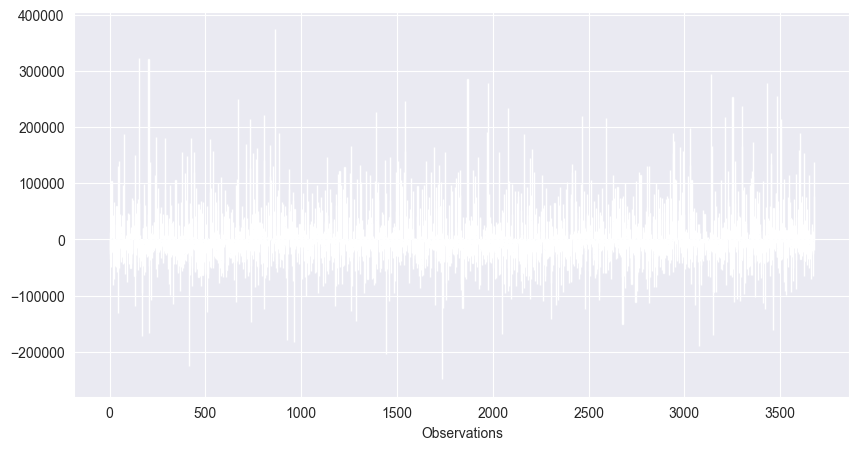

In [321]:
plt.figure(figsize=(10,5))
index=range(len(y_pred))
error=(y_test-y_pred).values

plt.bar(x=index,height=error,width=0.3)
plt.xlabel('Observations')

In [331]:
X_train_const=sm.add_constant(X_train)
nicerLR=sm.OLS(y_train,X_train_const).fit()
nicerLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2515.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:08:14   Log-Likelihood:            -1.8407e+05
No. Observations:               14711   AIC:                         3.682e+05
Df Residuals:                   14698   BIC:                         3.683e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.441e+06   1.06e+05    -23.010      0.000   -2.65e+06   -2.23e+06
longitude          -3.063e+04   1158.137    -26.449      0.000   -3.29e+04   -2.84e+04
latitude           -3.006e+04   1144.816    -26.254      0.000   -3.23e+04   -2.78e+04
housing_median_age  1045.3297     49.351     21.181      0.000     948.595    1142.064
total_rooms           -4.9235      1.542     -3.193      0.001      -7.946      -1.901
total_bedrooms       226.3771     15.379     14.720      0.000     196.233     256.521
population           -81.1045      1.945    -41.691      0.000     -84.918     -77.291
households            33.6981     17.463      1.930      0.054      -0.531      67.927
median_income       3.913e+04    429.988     91.013      0.000    3.83e+04       4e+04
<1H OCEAN          -1.227e+05    3.3e+04     -3.721      0.000   -1.87e+05   -5.81e+04
INLAND             -1.575e+05   3.31e+04     -4.765      0.000   -2.22e+05   -9.27e+04
NEAR BAY           -1.313e+05    3.3e+04     -3.976      0.000   -1.96e+05   -6.66e+04
NEAR OCEAN         -1.274e+05    3.3e+04     -3.860      0.000   -1.92e+05   -6.27e+04
==============================================================================
Omnibus:                     2709.475   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8454.857
Skew:                           0.947   Prob(JB):                         0.00
Kurtosis:                       6.194   Cond. No.                     5.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Random Forest Regressor

In [355]:
RF=RandomForestRegressor(n_estimators=1000)
RF.fit(X_train,y_train)
mean_squared_error(RF.predict(X_train),y_train,squared=False),mean_squared_error(RF.predict(X_test),y_test,squared=False)

(17841.31257256963, 48239.30712453188)

#### Ridge

In [356]:
RDG=Ridge()
RDG.fit(X_train,y_train)
mean_squared_error(RDG.predict(X_train),y_train,squared=False),mean_squared_error(RDG.predict(X_test),y_test,squared=False)

(65766.0245711445, 66702.9423423083)

#### Gradient Boosting Regressor

In [357]:
GB=GradientBoostingRegressor()
GB.fit(X_train,y_train)
mean_squared_error(GB.predict(X_train),y_train,squared=False),mean_squared_error(GB.predict(X_test),y_test,squared=False)

(52640.57842982545, 54856.238617057345)

---